In [1]:
from growth_rate import compute_growth_rate_linear
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [2]:
filemap_path = "/mnt/external.data/TowbinLab/spsalmon/pipeline_test_folder/analysis/report/analysis_filemap.csv"
filemap = pd.read_csv(filemap_path)

325
325
Growth rate: 1.6910938380540432e-05


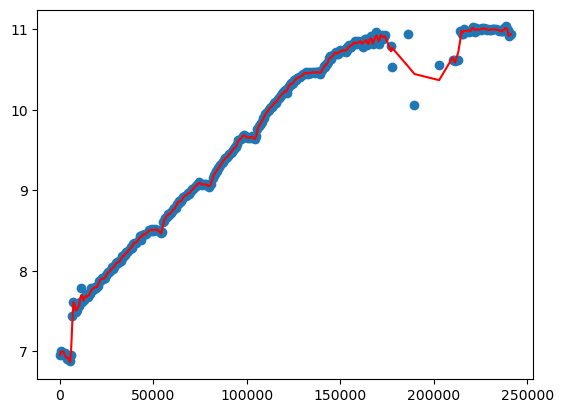

In [6]:
volume = filemap['ch2_seg_str_area'].to_numpy()
time = filemap['ExperimentTime'].to_numpy()
classification = filemap['ch2_seg_str_worm_type'].to_numpy()
volume = volume[classification != "error"]
time = time[classification != "error"]
volume = np.log(volume)


print(len(volume))
print(len(time))

growth_rate = compute_growth_rate_linear(volume, time)
print(f'Growth rate: {growth_rate}')

plt.plot(time, volume, 'o', label='Original data')
plt.plot(time, savgol_filter(volume, 5, 3), 'r-', label='Smoothed data')
plt.show()

In [4]:
diff = np.diff(log_volume_l1)/np.diff(time_l1)
plt.plot(time_l1[:-1], diff)
plt.show()
print(np.mean(diff))
print(np.median(diff))

NameError: name 'log_volume_l1' is not defined